In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


def moving_average(a, n=3) :
    weights = np.repeat(1.0, n)/n
    sma = np.convolve(a, weights, 'full')
    return sma[:-(n-1)]

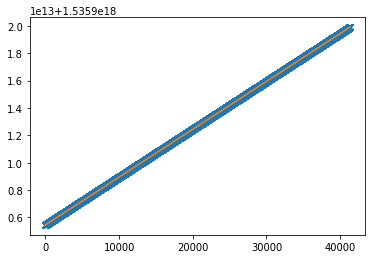

In [18]:
fname = 'servo.txt'

T = np.genfromtxt(fname, delimiter=',')
ptp = T[1:,0];
hw = T[1:,1];
est = T[1:,2];

# first timestamp is the reference
plot(ptp,'x')
plot(est)

In [13]:
(ptp[-1] - est[-1])*1e-9

-2.5656281600000002

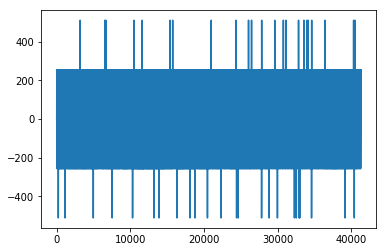

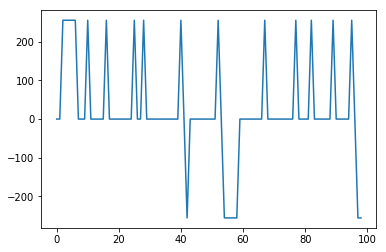

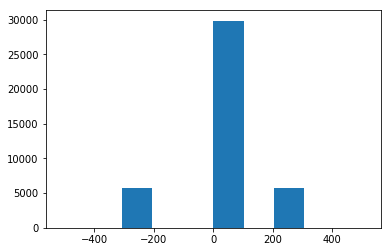

In [33]:
# plot timestamp difference
deviation = est-ptp;

plt.plot(deviation);
show();
plot(deviation[1:100]);
show();
hist(deviation);

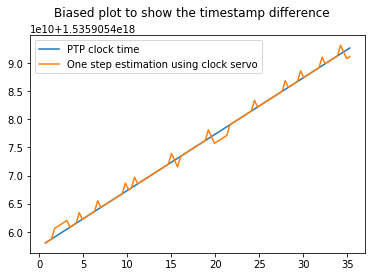

In [35]:
h = hw[0:100]/1e9;
e = est[0:100];
p = ptp[0:100];
d = e-p;

e2 = p + 6000000*d;
    
plot(h,p,label = 'PTP clock time');
plot(h,e2, label='One step estimation using clock servo');
suptitle("Biased plot to show the timestamp difference")
legend();